### lesson 30 Orthogonal Matrix

In [2]:
import numpy as np
import torch

Question 3

In [20]:
#numpy

I3 = np.array([[1,0,0],[0,1,0],[0,0,1]])
print(I3)

print('dot product col 0,1')
print('0,1')
np.dot(I3[0], I3[1])


[[1 0 0]
 [0 1 0]
 [0 0 1]]
dot product col 0,1
0,1


0

In [21]:
print('dot product of col 1,2')
np.dot(I3[1], I3[2])

dot product of col 1,2


0

In [22]:
print('dot product of col 0,2')
np.dot(I3[0], I3[2])

dot product of col 0,2


0

dot products are 0. all columns are orthogonal to each other

In [23]:
print('L2norm of col0')
np.linalg.norm(I3[0])


L2norm of col0


1.0

In [24]:
print('L2norm of col1')
np.linalg.norm(I3[1])

L2norm of col1


1.0

In [25]:
print('L2norm of col2')
np.linalg.norm(I3[2])

L2norm of col2


1.0

In [27]:
K = torch.tensor([[2/3,1/3,2/3],[-2/3,2/3,1/3],[1/3,2/3,-2/3]])
K

tensor([[ 0.6667,  0.3333,  0.6667],
        [-0.6667,  0.6667,  0.3333],
        [ 0.3333,  0.6667, -0.6667]])

In [28]:
print('dot product of col 0 ,1')
torch.dot(K[0], K[1])

dot prodict of col 0 ,1


tensor(0.)

In [29]:
print('dot product of col 1 ,2')
torch.dot(K[1], K[2])

dot prodict of col 1 ,2


tensor(0.)

In [35]:
print('dot product of col 0 ,2')
torch.dot(K[0], K[2])

dot product of col 0 ,2


tensor(0.)

In [32]:
print('norm of col 0')
torch.norm(K[0])

norm of col 0, 1


tensor(1.)

In [33]:
print('norm of col 1')
torch.norm(K[1])

norm of col 1


tensor(1.)

In [34]:
print('norm of col 2')
torch.norm(K[2])

norm of col 2


tensor(1.)

**Exercises**:

1. Use PyTorch to confirm $Xv = \lambda v$ for the first eigenvector of $X$.
2. Confirm $Xv = \lambda v$ for the remaining eigenvectors of $X$ (you can use NumPy or PyTorch, whichever you prefer).

In [39]:
X = torch.tensor([[25.0, 2, 9], [5.0, 26, -5], [3.0, 7, -1]], dtype = torch.float)
X

tensor([[25.,  2.,  9.],
        [ 5., 26., -5.],
        [ 3.,  7., -1.]])

In [66]:
L= torch.linalg.eig(X)
L

torch.return_types.linalg_eig(
eigenvalues=tensor([29.6762+0.j, 20.6212+0.j, -0.2974+0.j]),
eigenvectors=tensor([[ 0.7118+0.j,  0.6502+0.j, -0.3422+0.j],
        [ 0.6665+0.j, -0.7446+0.j,  0.2379+0.j],
        [ 0.2217+0.j, -0.1509+0.j,  0.9090+0.j]]))

In [67]:
L, V = L[0], L[1]

In [68]:
L #eigenvalues
L = L.type(torch.float)
L

tensor([29.6762, 20.6212, -0.2974])

In [69]:
V #eigenvectors
V = V.type(torch.float)
V

tensor([[ 0.7118,  0.6502, -0.3422],
        [ 0.6665, -0.7446,  0.2379],
        [ 0.2217, -0.1509,  0.9090]])

In [76]:
v_first =  V[:,0]
v_first

tensor([0.7118, 0.6665, 0.2217])

In [77]:
L_first = L[0]
L_first

tensor(29.6762)

In [80]:
L_first*v_first

tensor([21.1223, 19.7798,  6.5792])

In [81]:
torch.matmul(X,v_first)

tensor([21.1223, 19.7798,  6.5792])

## lesson 39

**Exercises**:

1. Use PyTorch to decompose the matrix $P$ (below) into its components $V$, $\Lambda$, and $V^{-1}$. Confirm that $P = V \Lambda V^{-1}$.
2. Use PyTorch to decompose the symmetric matrix $S$ (below) into its components $Q$, $\Lambda$, and $Q^T$. Confirm that $S = Q \Lambda Q^T$.

In [3]:
import torch

In [4]:
P = torch.tensor([[25, 2, -5], [3, -2, 1], [5, 7, 4.]])
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [8]:
ldas, v = torch.linalg.eig(P)

In [9]:
ldas

tensor([23.7644+0.j,  6.6684+0.j, -3.4328+0.j])

In [12]:
lda_ = torch.diag(ldas)

In [13]:
lda_

tensor([[23.7644+0.j,  0.0000+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  6.6684+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  0.0000+0.j, -3.4328+0.j]])

In [15]:
v_inv = torch.inverse(v)

In [16]:
v_inv

tensor([[ 1.1356+0.j,  0.0102+0.j, -0.2868+0.j],
        [ 0.3914+0.j, -0.7198-0.j, -1.0032+0.j],
        [ 0.0817+0.j, -1.1164-0.j,  0.2052+0.j]])

In [18]:
torch.matmul(v, torch.matmul(lda_, v_inv))

tensor([[25.0000+0.j,  2.0000+0.j, -5.0000+0.j],
        [ 3.0000+0.j, -2.0000+0.j,  1.0000+0.j],
        [ 5.0000+0.j,  7.0000+0.j,  4.0000+0.j]])

2. Use PyTorch to decompose the symmetric matrix $S$ (below) into its components $Q$, $\Lambda$, and $Q^T$. Confirm that $S = Q \Lambda Q^T$.

In [38]:
S = torch.tensor([[25, 2, -5], [2, -2, 1], [-5, 1, 4.]])
S

tensor([[25.,  2., -5.],
        [ 2., -2.,  1.],
        [-5.,  1.,  4.]])

In [39]:
ldas, v = torch.linalg.eig(S)

In [40]:
ldas

tensor([26.2361+0.j,  3.2435+0.j, -2.4796+0.j])

In [49]:
lda_ = torch.diag(ldas)

In [42]:
lda_

tensor([[26.2361+0.j,  0.0000+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  3.2435+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  0.0000+0.j, -2.4796+0.j]])

In [45]:
S_t = torch.t(S)

In [46]:
S_t

tensor([[25.,  2., -5.],
        [ 2., -2.,  1.],
        [-5.,  1.,  4.]])

In [50]:
torch.matmul(S, torch.matmul(S_t,lda_))

RuntimeError: expected scalar type Float but found ComplexFloat

### lesson 42 Singular Value Decomposition
**Exercise**: Using the matrix `P` from the preceding PyTorch exercises, demonstrate that these three SVD-eigendecomposition equations are true. 

In [1]:
import torch

In [2]:
P = torch.tensor([[25,4,-5],[3,-2,1],[5,7,4.]])

In [3]:
P

tensor([[25.,  4., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [4]:
u,d,vt = torch.linalg.svd(P)

In [5]:
u

tensor([[-0.9730,  0.1974,  0.1193],
        [-0.0894,  0.1539, -0.9840],
        [-0.2126, -0.9682, -0.1321]])

In [15]:
d

tensor([26.4718,  7.8794,  2.6752])

In [18]:
new_d = torch.diag(d)

In [19]:
new_d

tensor([[26.4718,  0.0000,  0.0000],
        [ 0.0000,  7.8794,  0.0000],
        [ 0.0000,  0.0000,  2.6752]])

In [7]:
vt

tensor([[-0.9692, -0.1965,  0.1483],
        [ 0.0706, -0.7989, -0.5972],
        [-0.2358,  0.5684, -0.7882]])

In [13]:
temp =torch.matmul(u,d)

In [21]:
torch.matmul(torch.matmul(u,new_d), vt)

tensor([[25.0000,  4.0000, -5.0000],
        [ 3.0000, -2.0000,  1.0000],
        [ 5.0000,  7.0000,  4.0000]])

### Lesson 46 Trace Operator


With the matrix `A_p` provided below: 

1. Use the PyTorch trace method to calculate the trace of `A_p`.
2. Use the PyTorch Frobenius norm method and the trace method to demonstrate that $||A||_F = \sqrt{\mathrm{Tr}(AA^\mathrm{T})}$


In [19]:
import torch
from math import sqrt
A_p = torch.tensor([[-1.,  2.],[ 3., -2.],[ 5.,  7.]])

In [20]:
A_p

tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])

In [12]:
torch.trace(A_p)

tensor(-3.)

In [13]:
# frobenious norm of A
torch.linalg.matrix_norm(A_p)

tensor(9.5917)

In [22]:
A_t = torch.transpose(A_p,0,1)
A_t

tensor([[-1.,  3.,  5.],
        [ 2., -2.,  7.]])

In [25]:
pdt = torch.matmul(A_p, A_t)

In [26]:
sqrt(torch.trace(pdt))

9.591663046625438

### chapter 76 ML with autodiff

1. use torch or tf autodiff  to find the slope of y=x^2+2x+2 where x=2. use delta method to confirm your answer

2.  use "regression in pytorch" notebook to simulate a new linear relationship between y and x, then fit the params m and b

3. read about how differntial programming, wherein computer programms can be differentiated, could be common soon. see pennylane.ai for quantum ML

answer to question 1: ???


https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

In [87]:
import torch

In [88]:
a=  torch.tensor([2.], requires_grad=True)


In [89]:
b = a**2+2*2+2

In [90]:
external_grad = torch.tensor([2.])
b.backward(gradient = external_grad)
print(b.grad)

C:\Users\User\Anaconda3\lib\site-packages\torch\_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten\src\ATen/core/TensorBody.h:417.)
  return self._grad


None


In [18]:
import torch
import matplotlib.pyplot as plt

In [11]:
generate 
x =  torch.tensor([0,1,2,3,4,5,6,7.])
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [13]:
#y = x**2+2*x+2+torch.normal(mean=torch.zeros(8), std=2)
#y

tensor([ 0.5904,  5.2656, 12.6435, 15.3458, 24.8301, 40.3066, 49.3377, 61.8671])

In [15]:
y = torch.tensor([0.5904,  5.2656, 12.6435, 15.3458, 24.8301, 40.3066, 49.3377, 61.8671])

answer to question 2

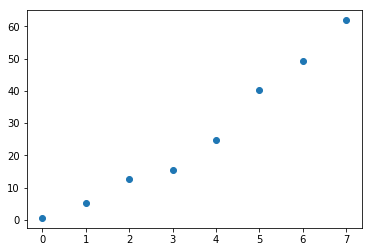

In [20]:
fig, ax = plt.subplots()
_ = ax.scatter(x,y)

In [21]:
# assume y = mx+b
# initialize model param
# enable gradeient tracking

m = torch.tensor([0.7]).requires_grad_()
m

tensor([0.7000], requires_grad=True)

In [23]:
b = torch.tensor([0.2]). requires_grad_()
b

tensor([0.2000], requires_grad=True)

In [29]:
def regression(x1, m1, b1):
    return m1*x1 + b1

In [54]:
def regression_plot(x1 ,y1, m1, b1):
    
    fig, ax = plt.subplots()
    
    ax.scatter(x1,y1)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, m1, b1).detach().item()
    y_max = regression(x_max, m1, b1).detach().item()
    
    ax.set_xlim([x_min, x_max])

    _ = ax.plot([x_min, x_max], [y_min, y_max])

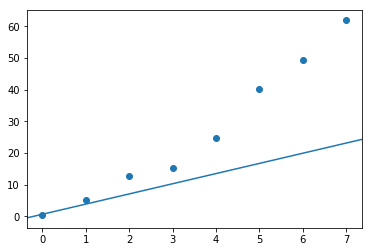

In [55]:
regression_plot(x,y,m,b)

In [56]:
# forward pass
yhat = regression(x,m,b)
yhat

tensor([ 0.6725,  3.8798,  7.0872, 10.2945, 13.5019, 16.7092, 19.9166, 23.1239],
       grad_fn=<AddBackward0>)

In [57]:
# calculate cost by comparing true y and y hat
cost_func = torch.nn.MSELoss()
cost = cost_func(yhat, y)
cost

tensor(388.7650, grad_fn=<MseLossBackward0>)

In [58]:
# autodiff to calculate gradient of cost wrt params
cost.backward()

In [59]:
m.grad

tensor([-410.4052])

In [60]:
b.grad

tensor([-75.9970])

In [61]:
# optimizer for gradient descent
optimizer = torch.optim.SGD([m,b], lr=0.01)
optimizer.step()


In [62]:
m
# init value:
# tensor([0.7000], requires_grad=True)

tensor([7.3114], requires_grad=True)

In [63]:
b
# init value: 
# tensor([0.2000], requires_grad=True)

tensor([1.4324], requires_grad=True)

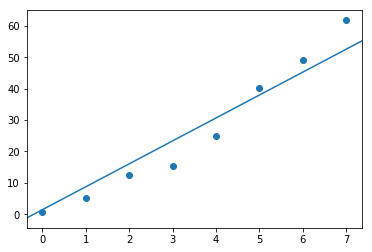

In [64]:
# test it out 
regression_plot(x,y,m,b)

In [67]:
# look at the new cost
cost = cost_func(regression(x,m,b), y)
cost
# previos cost = tensor(388.7650, grad_fn=<MseLossBackward0>)
# cost is reduced in one time gradient descent

tensor(28.7872, grad_fn=<MseLossBackward0>)

In [71]:
# iterate the optimizer 
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()    # reset to prevent memory leak
    yhat = regression(x, m, b)
    cost = cost_func(yhat,y) # calculate gradient of cost wrt to m & b
    cost.backward()          # autodiff to trace 
    optimizer.step()         # gradient descent to overwrite m and b
    print('epoch {}, cost{}, m gradient {}, b gradient {}'.format(epoch, '%.3g'%cost.item(), '%.3g'%m.grad.item(), '%.3g'%b.grad.item()))
    

epoch 0, cost27.8, m gradient -7.07, b gradient 2.22
epoch 1, cost27.3, m gradient -4.75, b gradient 2.67
epoch 2, cost27.1, m gradient -3.27, b gradient 2.95
epoch 3, cost26.9, m gradient -2.33, b gradient 3.12
epoch 4, cost26.7, m gradient -1.74, b gradient 3.22
epoch 5, cost26.6, m gradient -1.35, b gradient 3.28
epoch 6, cost26.5, m gradient -1.11, b gradient 3.3
epoch 7, cost26.4, m gradient -0.952, b gradient 3.32
epoch 8, cost26.2, m gradient -0.851, b gradient 3.32
epoch 9, cost26.1, m gradient -0.785, b gradient 3.31
epoch 10, cost26, m gradient -0.742, b gradient 3.3
epoch 11, cost25.9, m gradient -0.713, b gradient 3.28
epoch 12, cost25.8, m gradient -0.693, b gradient 3.27
epoch 13, cost25.7, m gradient -0.68, b gradient 3.25
epoch 14, cost25.6, m gradient -0.669, b gradient 3.23
epoch 15, cost25.5, m gradient -0.661, b gradient 3.22
epoch 16, cost25.4, m gradient -0.655, b gradient 3.2
epoch 17, cost25.2, m gradient -0.65, b gradient 3.18
epoch 18, cost25.1, m gradient -0.

epoch 294, cost16.5, m gradient -0.13, b gradient 0.641
epoch 295, cost16.5, m gradient -0.13, b gradient 0.637
epoch 296, cost16.5, m gradient -0.129, b gradient 0.634
epoch 297, cost16.5, m gradient -0.128, b gradient 0.63
epoch 298, cost16.5, m gradient -0.127, b gradient 0.626
epoch 299, cost16.5, m gradient -0.127, b gradient 0.623
epoch 300, cost16.5, m gradient -0.126, b gradient 0.619
epoch 301, cost16.5, m gradient -0.125, b gradient 0.616
epoch 302, cost16.4, m gradient -0.124, b gradient 0.612
epoch 303, cost16.4, m gradient -0.124, b gradient 0.609
epoch 304, cost16.4, m gradient -0.123, b gradient 0.605
epoch 305, cost16.4, m gradient -0.122, b gradient 0.602
epoch 306, cost16.4, m gradient -0.122, b gradient 0.598
epoch 307, cost16.4, m gradient -0.121, b gradient 0.595
epoch 308, cost16.4, m gradient -0.12, b gradient 0.591
epoch 309, cost16.4, m gradient -0.12, b gradient 0.588
epoch 310, cost16.4, m gradient -0.119, b gradient 0.584
epoch 311, cost16.4, m gradient -0.1

epoch 577, cost16.1, m gradient -0.0254, b gradient 0.125
epoch 578, cost16.1, m gradient -0.0252, b gradient 0.124
epoch 579, cost16.1, m gradient -0.0251, b gradient 0.123
epoch 580, cost16.1, m gradient -0.0249, b gradient 0.123
epoch 581, cost16.1, m gradient -0.0248, b gradient 0.122
epoch 582, cost16.1, m gradient -0.0246, b gradient 0.121
epoch 583, cost16.1, m gradient -0.0245, b gradient 0.121
epoch 584, cost16.1, m gradient -0.0244, b gradient 0.12
epoch 585, cost16.1, m gradient -0.0242, b gradient 0.119
epoch 586, cost16.1, m gradient -0.0241, b gradient 0.118
epoch 587, cost16.1, m gradient -0.0239, b gradient 0.118
epoch 588, cost16.1, m gradient -0.0238, b gradient 0.117
epoch 589, cost16.1, m gradient -0.0237, b gradient 0.116
epoch 590, cost16.1, m gradient -0.0235, b gradient 0.116
epoch 591, cost16.1, m gradient -0.0234, b gradient 0.115
epoch 592, cost16.1, m gradient -0.0233, b gradient 0.114
epoch 593, cost16.1, m gradient -0.0231, b gradient 0.114
epoch 594, cost

epoch 853, cost16.1, m gradient -0.00514, b gradient 0.0253
epoch 854, cost16.1, m gradient -0.00511, b gradient 0.0252
epoch 855, cost16.1, m gradient -0.00506, b gradient 0.025
epoch 856, cost16.1, m gradient -0.00506, b gradient 0.0249
epoch 857, cost16.1, m gradient -0.00503, b gradient 0.0247
epoch 858, cost16.1, m gradient -0.00499, b gradient 0.0246
epoch 859, cost16.1, m gradient -0.00497, b gradient 0.0244
epoch 860, cost16.1, m gradient -0.00494, b gradient 0.0243
epoch 861, cost16.1, m gradient -0.00491, b gradient 0.0242
epoch 862, cost16.1, m gradient -0.00488, b gradient 0.024
epoch 863, cost16.1, m gradient -0.00486, b gradient 0.0239
epoch 864, cost16.1, m gradient -0.00482, b gradient 0.0237
epoch 865, cost16.1, m gradient -0.00477, b gradient 0.0236
epoch 866, cost16.1, m gradient -0.00476, b gradient 0.0235
epoch 867, cost16.1, m gradient -0.00474, b gradient 0.0233
epoch 868, cost16.1, m gradient -0.00471, b gradient 0.0232
epoch 869, cost16.1, m gradient -0.0047, b

epoch 990, cost16.1, m gradient -0.00231, b gradient 0.0115
epoch 991, cost16.1, m gradient -0.00231, b gradient 0.0114
epoch 992, cost16.1, m gradient -0.00231, b gradient 0.0113
epoch 993, cost16.1, m gradient -0.00231, b gradient 0.0113
epoch 994, cost16.1, m gradient -0.00229, b gradient 0.0112
epoch 995, cost16.1, m gradient -0.00228, b gradient 0.0111
epoch 996, cost16.1, m gradient -0.00226, b gradient 0.0111
epoch 997, cost16.1, m gradient -0.00223, b gradient 0.011
epoch 998, cost16.1, m gradient -0.00224, b gradient 0.0109
epoch 999, cost16.1, m gradient -0.00223, b gradient 0.0109


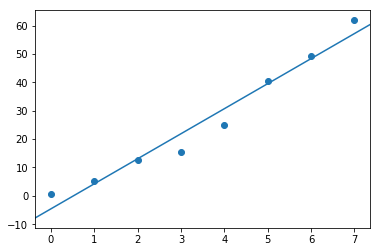

In [72]:
regression_plot(x,y,m,b)

In [74]:
m

tensor([8.8268], requires_grad=True)

In [75]:
b

tensor([-4.6150], requires_grad=True)

## Chapter 80 Calculating Partial Derivatives with AutoDiff


calculate
- the value of z
- the slope of z with respect to x
- the slope of z with respect to y

at the points where
1. x = 3, y = 0
2. x = 2, y = 3
3. x =-2, y = -3

In [1]:
import torch

In [2]:
def f(my_x, my_y):
    return my_x**2 - my_y**2

In [3]:
def f2(my_x, my_y):
    x = torch.tensor(my_x).requires_grad_()
    y = torch.tensor(my_y).requires_grad_()
    z = f(x,y)
    z.backward()
    
    output1 = z
    output2 = x.grad
    output3 = y.grad
    
    print ('z = ', output1)
    print('slope of z wrt x = ', output2)
    print('slope of z wrt y = ', output3)
    
    

In [5]:
f2(3.0,0.0)

z =  tensor(9., grad_fn=<SubBackward0>)
slope of z wrt x =  tensor(6.)
slope of z wrt y =  tensor(-0.)


In [7]:
f2(2.0, 3.0)

z =  tensor(-5., grad_fn=<SubBackward0>)
slope of z wrt x =  tensor(4.)
slope of z wrt y =  tensor(-6.)


In [8]:
f2(-2.0, -3.)

z =  tensor(-5., grad_fn=<SubBackward0>)
slope of z wrt x =  tensor(-4.)
slope of z wrt y =  tensor(6.)


## Chapter 102 exercise in numerical integrals

In [2]:
from scipy.integrate import quad

def f(x):
    return 2*x

quad(f,3,4)

(7.0, 7.771561172376096e-14)

## Chapter 112 exercise on event probability

In [10]:
def factorial(n):
    pdt = 1
    for i in range (1, n+1):
        pdt = pdt * i
    return pdt

In [17]:
def prob (n,k):
    nk = factorial(n)/ (factorial(k)*factorial(n-k))
    return nk/2**n

In [20]:
[prob(5, i) for i in range(6)]

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]